# Project on Boston House Prices dataset

This assessment is based on well-known Boston House Price dataset. I am planning on utilizing Python packages scipy, Keras, and this jupyter notebook to complete it. I am going to use descriptive statistics and plots to describe the Boston House Prices dataset. I will also use inferential statistics to analyse whether there is difference in median house prices amongst the houses located along the Charles river and those that are not. In the final section when the dataset it clearly described i will create a nueral network using Keras in order to predict median house prices based on the dataset variables.

The assessment structure is as follow:
1. Importing the Boston House Price Dataset
2. Quantitatively understand the features
3. Look for patterns
4. Inferential statistics to analyse House prices along the river
5. T-test 
6. Nueral Network Model

In [143]:
#Importing necessary packages

#Numpy is general-purpose array-processing package
import numpy as np
#Panda package for data manipulation and analysis which i will need for the dataset
import pandas as pd
#Scipy.stats package contains a large number of probability distributions and statistical functions
import scipy.stats as ss
#Seaborn is a statistical data visualization package
import seaborn as sns

#Packages for visualisation purpose
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for the notebook
%matplotlib inline

#Library for Keras and Tenserflow to create Nueral Network 
import tensorflow as tf 
import keras as kr
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1. Importing the Dataset

In [144]:
#Downloading the dataset
from sklearn.datasets import load_boston

In [145]:
boston = load_boston()

In [146]:
#First look into the dataset
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The dataset appears to be 2D NumPy array.

In [147]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [148]:
#list of all the keys in the dictionary(field names)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [149]:
data = boston.data
type(data)

numpy.ndarray

In [150]:
#converting it to pandas dataframe 
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [151]:
#including the the median house price column as its not in the features
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Panda library inserts NaN for any missing data. It is good practice to clean the data by removing any NaN.

In [152]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

For this dataset there is no NaN values. I can move on to the next step.

### 2. Understanding the Data within the Dataset (Descriptive Statistics)

In order to better understand the data and to be able later to justify my results the first section of this assignment will be based on me familiarizing myself with the Boston Housing Data. This will be evident through describing the dataset by code and demonstrating its features and target variables. 

Boston House Prices Dataset is derived from information collected by the U.S. Census Service in 1978 which describes housing in various suburbs of Boston, Massachusetts. 
The Boston Housing Dataset potrays the prices of houses in Boston based of various variables such as:
- (CRIM) crime
- (ZN) residential land zone for lots larder than 25,000 sq.ft. 
- (INDUS) areas of non-retail business in the town
- (CHAS) Charles river dummy variable (track bounds river=1, otherwise 0)
- (NOX) nitric oxides concentration  
- (RM) number of rooms per house
- (AGE) the age of people who own the house
- (DIS) distance to five Boston employment centers
- (RAD) index of accessability to highways
- (TAX) full-value property-tax rate per 10,000 dollars
- (PTRATIO) pupil teacher ratio by town
- (B) people of African America descent by town
- (LSTAT) percentage lower status of the population

Dataset contains of 506 rows and 14 rows : $$ X(506 x 14) $$.



In [153]:
data.shape

(506, 14)

The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.

why have they only focused on those features?
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

In [154]:
#understanding the data by accessig the statistical details
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This table gives a high-level idea of how everything is distributed. This code compiles various properties including the mean, standard deviation, minimum, and maximum for each column.

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


describe the data you see above here

The type of each column is a float there is a total of 14 columns with 506 entries.

https://www.youtube.com/watch?v=ZeM2tHtjGy4
    
keras 
https://www.youtube.com/watch?v=UJwK6jAStmg 

## Correlation / linear regression of the dataset

The below table shows the correlation between each set of values. Large positive scores between the features show that there is a strong positive correlation. We see a maximum of value 1 in all the diagonal values. 

There are various ways to implement linear regression, either using scikit-learn, stats model, numpy, or scipy

Data correlation is very important when building neural network 

In [156]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The maximum values of 1 are runnning diagonally.

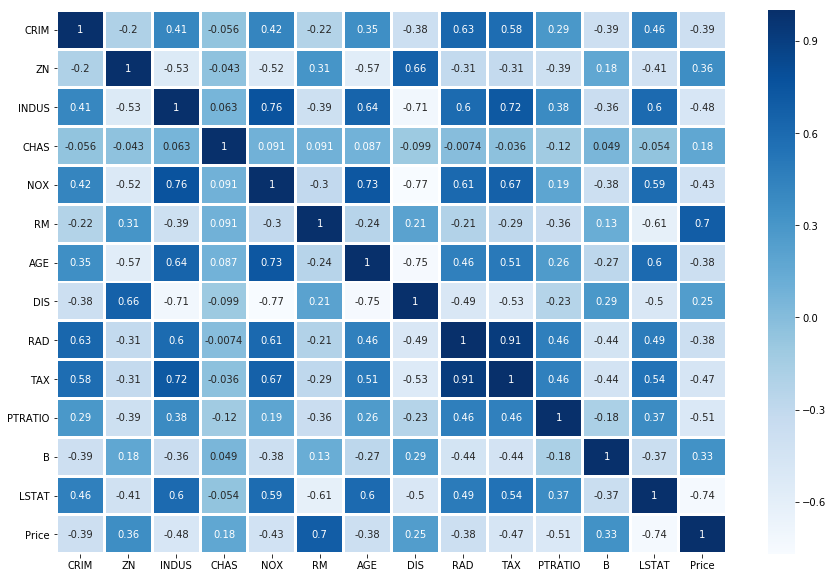

In [157]:
large_correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(large_correlation, annot=True, linewidths=2, linecolor='white', cmap="Blues")

Four variables were chosen below along with the house price variable to show a range of correlations:

- (RM) number of rooms per house
- (AGE) the age of people who own the house
- (TAX) full-value property-tax rate per 10,000 dollars
- (PTRATIO) pupil teacher ratio by town
- (CRIM) crime
- (Price) median house price

In [158]:
sample = ['RM', 'AGE', 'TAX', 'PTRATIO','CRIM', 'Price'] 

In [159]:
data[sample].head()

,RM,AGE,TAX,PTRATIO,CRIM,Price
0,6.575,65.2,296.0,15.3,0.00632,24.0
1,6.421,78.9,242.0,17.8,0.02731,21.6
2,7.185,61.1,242.0,17.8,0.02729,34.7
3,6.998,45.8,222.0,18.7,0.03237,33.4
4,7.147,54.2,222.0,18.7,0.06905,36.2


In [160]:
 data[sample].corr()

,RM,AGE,TAX,PTRATIO,CRIM,Price
RM,1.000000,-0.240265,-0.292048,-0.355501,-0.219247,0.695360
AGE,-0.240265,1.000000,0.506456,0.261515,0.352734,-0.376955
TAX,-0.292048,0.506456,1.000000,0.460853,0.582764,-0.468536
PTRATIO,-0.355501,0.261515,0.460853,1.000000,0.289946,-0.507787
CRIM,-0.219247,0.352734,0.582764,0.289946,1.000000,-0.388305
Price,0.695360,-0.376955,-0.468536,-0.507787,-0.388305,1.000000


Above table shows the correlation score between chosen set of variables. Large positive scores(0.5/0.6) indicate a strong positive (that is, in the same direction) correlation.

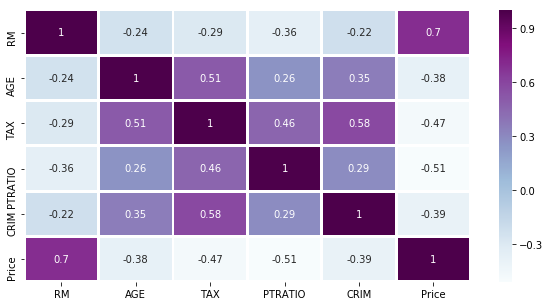

In [161]:
sample_correlation = data[sample].corr()
plt.figure(figsize=(10,5))
sns.heatmap(sample_correlation, annot=True, linewidths=2, linecolor='white', cmap="BuPu")

A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors. Colors help us understand the relation amongst numbers faster. For example, dark purple shows very strong correlation which is represented by 1. 

Number of rooms (RM) shows a strong positive correlation (0.69) with price, highlighting that increasing number of rooms has a strong positive effect on the price of a house in the Boston area. As this is the highest correlation value out of all 13 variables examined, we can say that number of rooms is the strongest indicator of house price for this set of data.

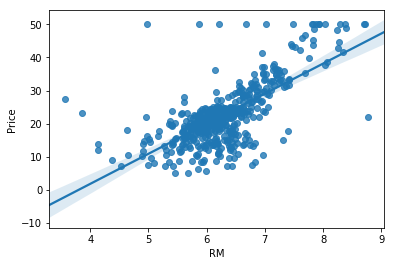

In [162]:
sns.regplot(x=data["RM"], y=data["Price"])

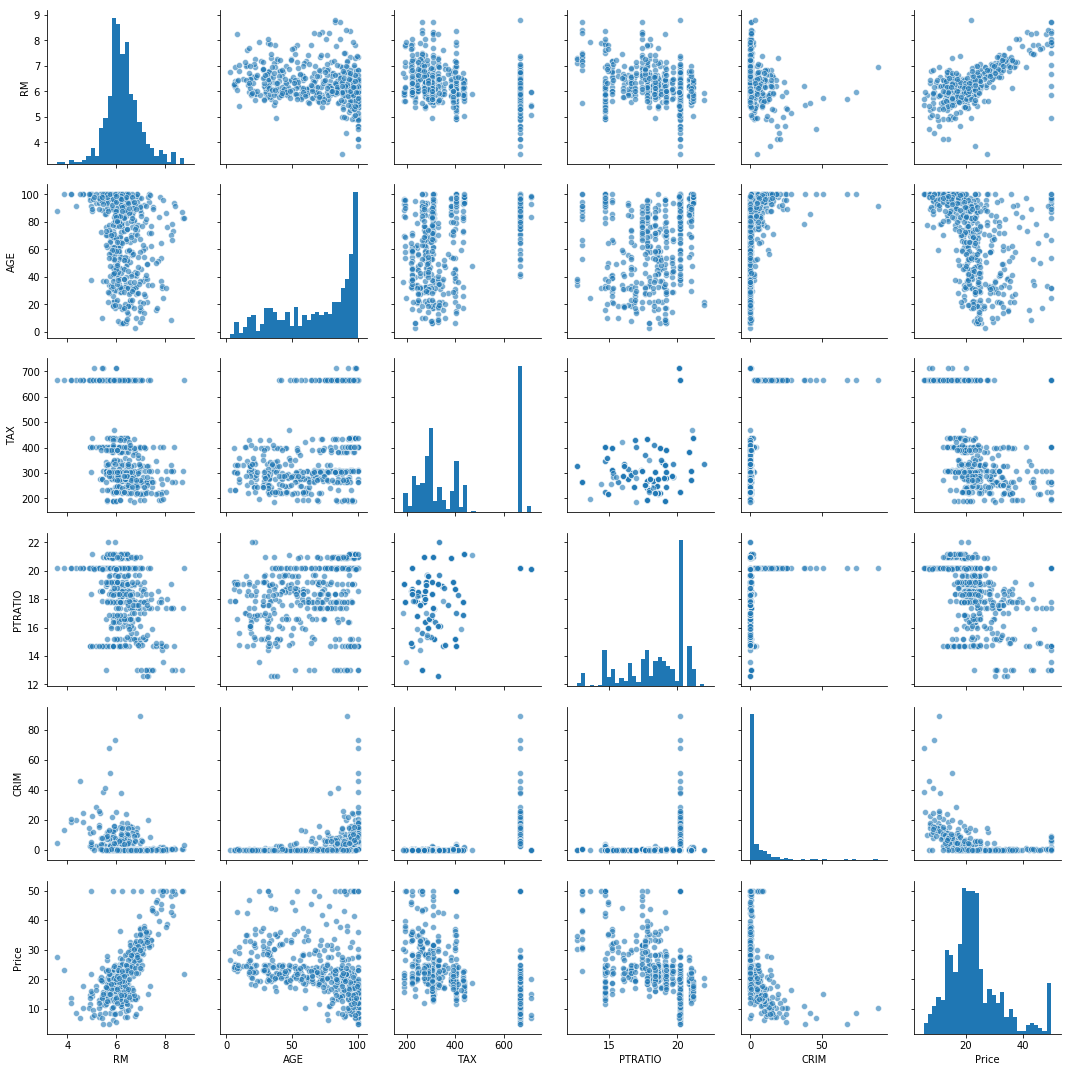

In [163]:
sns.pairplot(data[sample],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 

Age of the house (AGE) shows a low-moderate negative correlation with house price. As would be expected, newer houses tend to sell for more money, which is in line with the negative correlation seen here. However, the weaker correlation (0.38) suggests that age is not such a strong indicator of house price. Age of the house is one of the weakest correlations in this dataset. ITS MINUS 38 SO I WONDER WILL IT MATTER

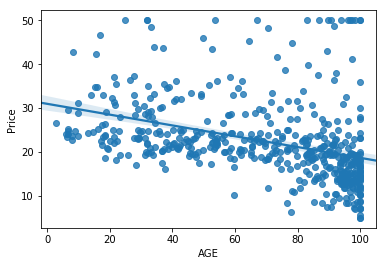

In [164]:
sns.regplot(x=data["AGE"], y=data["Price"])

### Neural Network for Boston house prices dataset:

#### Introduction

Well-trained neural network should provide decent predictions of house prices based on the variable of the dataset. Good explanations of how to use the neural network and how it works.

Machine Learning represents a relatively new field in the world of computing that allows computers to perform abstract tasks and aproximate answers. Before this, computers could only be programmed to perform very specific tasks. Modern applications of machine learning can be seen absolutely everywhere from snapchat filters to cancer diagnoses to autonomous vehicles. 

Neural network is a system that is used to make predictions of outcomes when the system is presented with a number of inputs. The input and output variables must be correlated in some way as influence eachother. A neural net will start off with very poor proximation of the output but can be trained using training data to give more accurate results. Training data will contain both input and output data and the neural net will often use a process known as backpropagation to minimize errors. 

The term machine learning can be used to describe many different types of nueral networks. A common type of nueral network that is often used for introduction to machine learning is the multilayer perceptron which I will create in this notebook. 

Multilayer perceptron describes a neural network made of multiple layers; input layer, output layer and one or multiple hidden layers between input and output. Each layer contains several cells. The cells take inputs, multiply them by series of weights, add a bias, and passes the results to the next layer. At the end a number of outoups will be calculated. 

A technique called backpropagation is used to make the system more accurate. In this process training data is used and error is calculated after each training itteration. When the error is calculated the system will adjust the weights of the hidden layer cells to minimize the error.

<img src="MLP.png" style="width: 400px;">

#### Method

To start, first step is to determine the structure of the neural network. Structure is how many hidden layers and how many nuerons per layer (nodes).
Smaller and simpler neural nets train faster but may not be able to accurately predict outcomes of a more complex system.
A nueral network that is too deep (too many nodes and layers) may result in overfitting. Overfitting occurs when nueral network is so complex that it can very accurately predict the training data, but the structure is so complex it is not good at generalisation; an overfitted nueral net will be very accurate for training data but will not give accuarate results for new data.

training data 80%
validation data 20%
for the code: validation_split

relu provides faster training of the model vs sigmoid

In [36]:
#df = data.values
#x = df[:,0:13]
#y = df[:,13]

###  Inputs

In [37]:
#x = data[['CRIM', 'CHAS', 'RM', 'AGE', 'TAX', 'B']]

### Outputs

In [38]:
#y = data['Price']

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(data)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[13], scaler.min_[13]))
multiplied_by = scaler.scale_[13]
added = scaler.min_[13]

scaled_data = pd.DataFrame(scaled_train, columns=data.columns.values)

Note: median values were scaled by multiplying by 0.0222222222 and adding -0.111111


In [17]:
scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,0.276596,0.996722,0.295254,0.397778
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684,0.491111
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.173913,0.236641,0.276596,0.974104,0.778146,0.255556
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117,0.308889


In [18]:
#x = scaled_data[['CRIM', 'CHAS', 'RM', 'AGE', 'TAX']]

In [19]:
#y = scaled_data['Price']

In [20]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(64, input_dim=13, activation="relu"))

m.add(kr.layers.Dense(32, activation="relu"))


m.add(kr.layers.Dense(1, activation="sigmoid"))

c = tf.keras.optimizers.RMSprop(0.01)

# Compile the model.
m.compile(loss="mean_squared_error", optimizer=c, metrics=['accuracy'])

In [21]:
history = m.fit(
    x = scaled_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']],
    y = scaled_data['Price'],
    #x,
    #y,
    shuffle=True,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    #verbose=0
)

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.0173 - val_loss: 0.0136 - val_accuracy: 0.0098
Epoch 2/100
404/404 [==============================] - 0s 92us/step - loss: 0.0253 - accuracy: 0.0272 - val_loss: 0.0331 - val_accuracy: 0.0098
Epoch 3/100
404/404 [==============================] - 0s 139us/step - loss: 0.0192 - accuracy: 0.0347 - val_loss: 0.0067 - val_accuracy: 0.0098
Epoch 4/100
404/404 [==============================] - 0s 122us/step - loss: 0.0167 - accuracy: 0.0371 - val_loss: 0.0064 - val_accuracy: 0.0098
Epoch 5/100
404/404 [==============================] - 0s 129us/step - loss: 0.0129 - accuracy: 0.0347 - val_loss: 0.0476 - val_accuracy: 0.0098
Epoch 6/100
404/404 [==============================] - 0s 142us/step - loss: 0.0133 - accuracy: 0.0396 - val_loss: 0.0068 - val_accuracy: 0.0098
Epoch 7/100
404/404 [==============================] - 0s 137us/step - loss: 0.0102 - a

Epoch 57/100
404/404 [==============================] - 0s 130us/step - loss: 0.0033 - accuracy: 0.0421 - val_loss: 0.0075 - val_accuracy: 0.0098
Epoch 58/100
404/404 [==============================] - 0s 107us/step - loss: 0.0032 - accuracy: 0.0421 - val_loss: 0.0114 - val_accuracy: 0.0098
Epoch 59/100
404/404 [==============================] - 0s 118us/step - loss: 0.0050 - accuracy: 0.0396 - val_loss: 0.0073 - val_accuracy: 0.0098
Epoch 60/100
404/404 [==============================] - 0s 140us/step - loss: 0.0029 - accuracy: 0.0421 - val_loss: 0.0086 - val_accuracy: 0.0098
Epoch 61/100
404/404 [==============================] - 0s 115us/step - loss: 0.0031 - accuracy: 0.0421 - val_loss: 0.0182 - val_accuracy: 0.0098
Epoch 62/100
404/404 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.06 - 0s 150us/step - loss: 0.0046 - accuracy: 0.0421 - val_loss: 0.0083 - val_accuracy: 0.0098
Epoch 63/100
404/404 [==============================] - 0s 153us/step - loss: 0.00

In [22]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


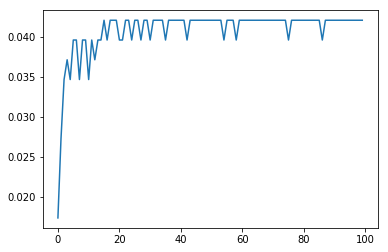

In [23]:
plt.plot(history.history['accuracy'])

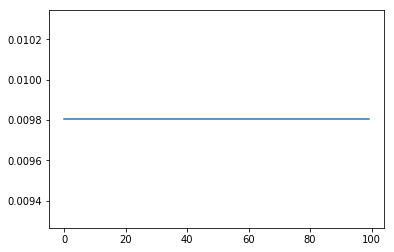

In [24]:
plt.plot(history.history['val_accuracy'])

refrence:
nueral net explanation - intro- https://skymind.ai/wiki/neural-network

https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

https://www.curiousily.com/posts/tensorflow-2-and-keras-quick-start-guide/

https://www.tensorflow.org/guide/keras/train_and_evaluate

explanation / defenitions of the code pararmeters used \https://keras.io/models/sequential/

https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

heatmaps - https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


https://www.youtube.com/watch?v=T91fsaG2L0s